In [ ]:
labels_l3 = ["SAMPLE_NUMBER",
             "UTC_TIME",
             "EPHEMERIS_SECONDS",
             "RESIDUAL_CALIBRATED_X_BAND_FREQUENCY_SHIFT",
             "RESIDUAL_CALIBRATED_X_BAND_FREQUENCY_SHIFT_AFTER_BASELINE_FIT",
             "RECONSTRUCTED_TRANSMIT_FREQUENCY",
             #"RADIUS",
             "SIGMA_RADIUS",
             "BENDING_ANGLE",
             "SIGMA_BENDING_ANGLE",
             #"REFRACTIVE_INDEX",
             "REFRACTIVITY",
             "SIGMA_REFRACTIVITY",
             "SIGNAL_LEVEL",
             "DIFFERENTIAL_DOPPLER",
             #"LONGITUDE",
             #"LATITUDE",
             "IMPACT_PARAMETER",
             "SIGMA_IMPACT_PARAMETER"]

In [ ]:
labels_l4 = ["SAMPLE_NUMBER",
             "UTC_TIME",
             "EPHEMERIS_SECONDS",
             #"RADIUS",
             #"LATITUDE",
             #"LONGITUDE",
             "GEOPOTENTIAL",
             "GEOPOTENTIAL_HEIGHT",
             "PRESSURE_LOWER_TEMPERATURE_AT_BOUNDARY",
             "SIGMA_PRESSURE_LOWER_TEMPERATURE_AT_BOUNDARY",
             "PRESSURE_MEDIUM_TEMPERATURE_AT_BOUNDARY",
             "SIGMA_PRESSURE_MEDIUM_TEMPERATURE_AT_BOUNDARY",
             #"PRESSURE_HIGHER_TEMPERATURE_AT_BOUNDARY",
             "SIGMA_PRESSURE_HIGHER_TEMPERATURE_AT_BOUNDARY",
             "TEMPERATURE_LOWER_TEMPERATURE_AT_BOUNDARY",
             "SIGMA_TEMPERATURE_LOWER_TEMPERATURE_AT_BOUNDARY",
             "TEMPERATURE_MEDIUM_TEMPERATURE_AT_BOUNDARY",
             "SIGMA_TEMPERATURE_MEDIUM_TEMPERATURE_AT_BOUNDARY",
             #"TEMPERATURE_HIGHER_TEMPERATURE_AT_BOUNDARY",
             "SIGMA_TEMPERATURE_HIGHER_TEMPERATURE_AT_BOUNDARY",
             #"NUMBER_DENSITY",
             "SIGMA_NUMBER_DENSITY",
             "SOLAR_ZENITH_ANGLE",
             "LOCAL_SOLAR_TIME"]

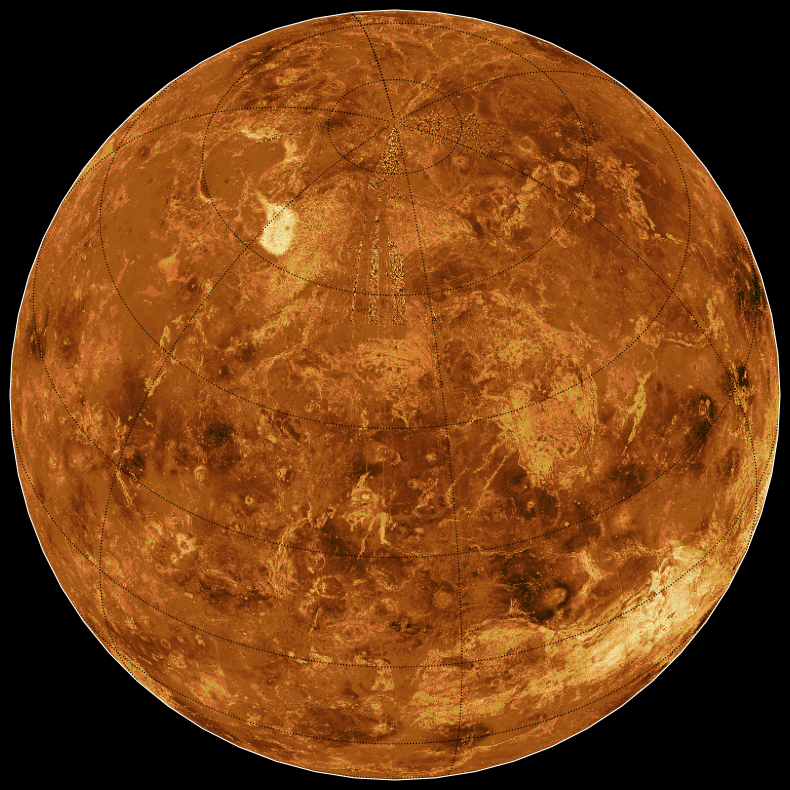

In [24]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import urllib.request
from PIL import Image

img = plt.imread("/home/dev/Desktop/Venus/Images/venmap.gif")    # Magellan orbiter map
# img = plt.imread("/home/dev/Desktop/Venus/Images/venmap2.tif") # Topographic map of Venus

## if using online image use the following snippet
# url = 'https://solarviews.com/raw/venus/venuscyl2.tif'
# response = urllib.request.urlopen(url)
# img = Image.open(response)

plt.style.use('dark_background')
plt.figure(figsize=(10, 10))

ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.gridlines(color='black', linestyle='dotted')
ax.imshow(img, origin="upper", extent=(-180, 180, -90, 90),
          transform=ccrs.PlateCarree())  # Important
plt.show()

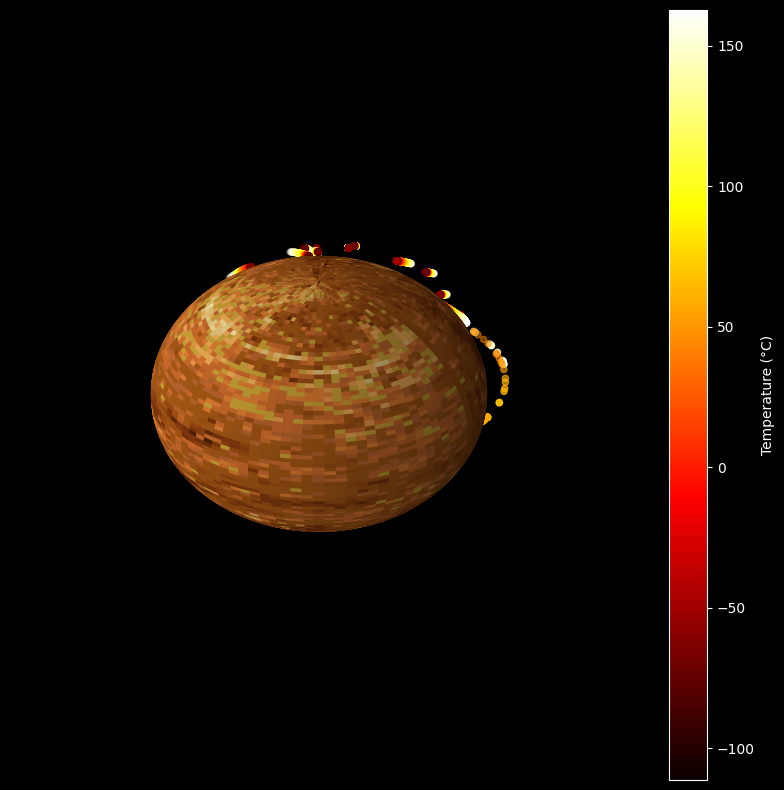

In [14]:
import os
import glob
import numpy as np
import pandas as pd
from matplotlib.image import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Path to the l4 data
combo_folder = '/home/dev/Desktop/Venus/Data/'
directory = ['vcors_2001','vcors_2002','vcors_2003','vcors_2004']
subdirectory = ['l4']
subsubdirectories=['ingress','egress']

venus_radius = 6051.8

# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
plt.style.use('dark_background')
ax = fig.add_subplot(111, projection='3d')


# Draw the sphere with a specific radius
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = venus_radius * np.outer(np.cos(u), np.sin(v))
y = venus_radius * np.outer(np.sin(u), np.sin(v))
z = venus_radius * np.outer(np.ones(np.size(u)), np.cos(v))
# ax.plot_wireframe(x, y, z, color='gray', alpha=0.3)
# ax.plot_surface(x, y, z, color='chocolate', alpha=0.9)

# image_file = '/home/dev/Desktop/Venus/Images/venmap.gif'
def mpl_sphere(image_file):
    img = plt.imread(image_file)

    # define a grid matching the map size, subsample along with pixels
    theta = np.linspace(0, np.pi, img.shape[0])
    phi = np.linspace(0, 2*np.pi, img.shape[1])

    count = 180 # keep 180 points along theta and phi
    theta_inds = np.linspace(0, img.shape[0] - 1, count).round().astype(int)
    phi_inds = np.linspace(0, img.shape[1] - 1, count).round().astype(int)
    theta = theta[theta_inds]
    phi = phi[phi_inds]
    img = img[np.ix_(theta_inds, phi_inds)]
    ax.plot_surface(x-500,y-500,z-500, facecolors=img/255, cstride=1, rstride=1)
 
if __name__ == "__main__":
    image_file = '/home/dev/Desktop/Venus/Images/venmap.gif'
    mpl_sphere(image_file)
#    plt.show()
    
csv_files = []
for directory in directory:
    for subdirectory in subdirectory:
        for subsubdirectory in subsubdirectories:
            folder_path = os.path.join(combo_folder, directory, subdirectory, subsubdirectory)
            files = glob.glob(os.path.join(folder_path, '*.csv'))
            csv_files.extend(files)
            
# Iterate over the files in the combo folder
for csv_file in csv_files:
    # Load the combined dataset
    df = pd.read_csv(csv_file)

    # Extract the required columns
    latitude = df.iloc[:,4]
    longitude = df.iloc[:,5]
    temperature = df.iloc[:,18]
    height = df.iloc[:,3] #- venus_radius

    # Convert latitude and longitude to radians and Cartesian coordinates
    lats = np.radians(latitude)
    longs = np.radians(longitude)
    # xs = height * np.cos(longs) * np.cos(lats)
    # ys = height * np.sin(longs) * np.cos(lats)
    # zs = height * np.sin(longs)
    
    # Create a grid of points on the sphere's surface
    xs = venus_radius * np.sin(lats) * np.cos(longs)
    ys = venus_radius * np.sin(lats) * np.sin(longs)
    zs = venus_radius * np.cos(lats)
    
    # Plot the points on the sphere with color mapped to temperatures
    scatter = ax.scatter(xs, ys, zs, c=temperature-273, cmap='hot', marker='o')


# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax, label='Temperature (°C)')

# Make planes transparent
ax.xaxis.pane.fill = False # Left plane
ax.yaxis.pane.fill = False # Right plane
ax.zaxis.pane.fill = False # Horizontal plane
# cbar.set_label('Temperature')


# Remove grid lines
ax.grid(False)

# Set the plot limits
# ax.set_xlim([-venus_radius, venus_radius])
# ax.set_ylim([-venus_radius, venus_radius])
# ax.set_zlim([-venus_radius, venus_radius])

# # Set labels for the axes
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# Remove tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# Transparent spines
ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Transparent panes
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# No ticks
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])
# Show the plot
plt.show()